In [92]:
import cv2
import numpy as np
import glob
import random
import matplotlib.pyplot as plt


# Load Yolo
net = cv2.dnn.readNet("yolov3_training_last.weights", "yolov3_training.cfg")

# Name custom object
classes = ["plate"]

In [93]:
 net.getUnconnectedOutLayers()

array([[200],
       [227],
       [254]], dtype=int32)

In [94]:

img_path=r"C:\Users\asus\Desktop\7.jpg"

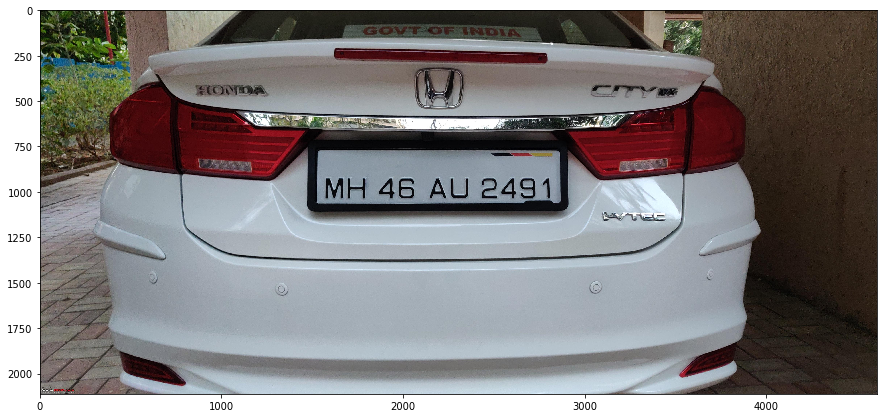

In [95]:
im_test=cv2.imread(img_path)
im_test1=cv2.cvtColor(im_test,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))
plt.imshow(im_test1)
plt.show()

In [96]:
import matplotlib.pyplot as plt

In [97]:
layer_names=net.getLayerNames()
layer_names


['conv_0',
 'bn_0',
 'relu_1',
 'conv_1',
 'bn_1',
 'relu_2',
 'conv_2',
 'bn_2',
 'relu_3',
 'conv_3',
 'bn_3',
 'relu_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'relu_6',
 'conv_6',
 'bn_6',
 'relu_7',
 'conv_7',
 'bn_7',
 'relu_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'relu_10',
 'conv_10',
 'bn_10',
 'relu_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'relu_13',
 'conv_13',
 'bn_13',
 'relu_14',
 'conv_14',
 'bn_14',
 'relu_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'relu_17',
 'conv_17',
 'bn_17',
 'relu_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'relu_20',
 'conv_20',
 'bn_20',
 'relu_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'relu_23',
 'conv_23',
 'bn_23',
 'relu_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'relu_26',
 'conv_26',
 'bn_26',
 'relu_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'relu_29',
 'conv_29',
 'bn_29',
 'relu_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'relu_32',
 'conv_32',
 'bn_32',
 'relu_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'relu_35',
 'conv_35',
 'b

In [98]:
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
output_layers

['yolo_82', 'yolo_94', 'yolo_106']

In [99]:
img = cv2.imread(img_path)
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

In [100]:
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)


In [101]:
net.setInput(blob)
outs = net.forward(output_layers)
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.3:
                # Object detected
            print(class_id)
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

                # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

0


[[0]]


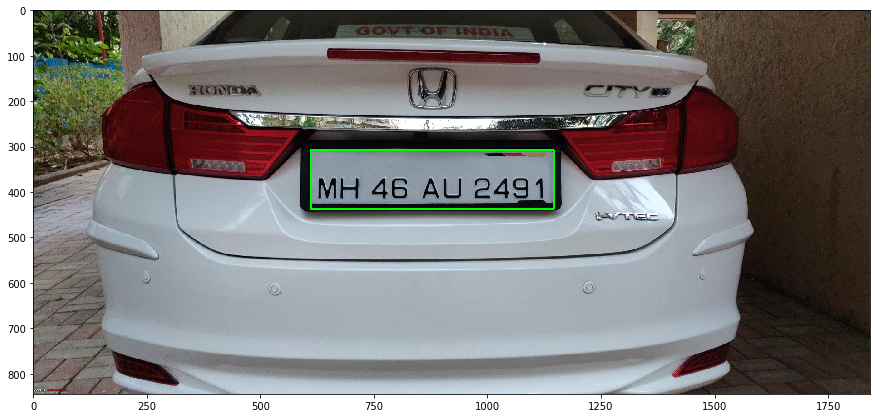

In [102]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        #olor = colors[class_ids[i]]
        cv2.rectangle(img, (x, y), (x + w, y + h), (0,255,0), 3)
            #cv2.putText(img, label, (x, y + 30), font, 3, color, 2)


    #cv2.imshow("Image", img)
plate_image=img[y:y+h,x:x+w]
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))
plt.imshow(img)

In [103]:
def plot_images(img1):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    #ax1.set(xticks=[], yticks=[], title=title1)

   

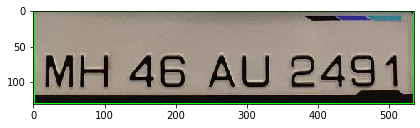

In [104]:
plot_images(plate_image)

In [105]:
import pandas as pd
import numpy as np
import cv2
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from matplotlib import pyplot as plt

In [106]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image

arr_out = []
arr_result = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

model=load_model(r'C:\Users\asus\Downloads\vit\ocr.h5')

In [107]:
def test(a,b,c,d,imd):                # to predict the character present in the region of interest
    test=imd[b:b+d,a:a+c]
    _,test_image = cv2.threshold(test,100,255,cv2.THRESH_BINARY)
    test_image= cv2.copyMakeBorder(test_image,10,10,10,10,cv2.BORDER_CONSTANT,value=(255,255,255))
    test_image = cv2.medianBlur(test_image.copy(),3)
    test_image = cv2.resize(test_image.copy(),(64,64),interpolation = cv2.INTER_AREA)
    t = test_image.copy()
    cv2.resize(test_image,(64,64))
    test_image=(img_to_array(test_image))/255
    test_image=np.expand_dims(test_image, axis = 0)
    result=model.predict(test_image)  
    np.reshape(result, 36)
    high = np.amax(test_image)
    low = np.amin(test_image)
    if high != low:
        maxval = np.amax(result)
        index = np.where(result == maxval)
        arr_out.append(arr_result[index[1][0]])

In [108]:
img_plate = cv2.cvtColor(plate_image,cv2.COLOR_BGR2GRAY)
blur = cv2.bilateralFilter(img_plate.copy(),9,75,75)
_, thresh = cv2.threshold(blur.copy(), 100, 255, cv2.THRESH_BINARY)
contours, h = cv2.findContours(thresh.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)



for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    


In [109]:
from tensorflow.keras.preprocessing.image import img_to_array

maxar = 10000 
minar = 1000
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    if w*h < maxar and w*h > minar:
        test(x,y,w,h,img_plate)

In [110]:
x,y,w,h

(531, 2, 3, 3)

In [111]:
final = ""
i = 0
for ch in reversed(arr_out):
    i += 1
    final = final+ch

print('\n',final)


 MH4EA249U


In [112]:
im_test = cv2.rectangle(im_test, (x, y), (x + w, y + h), (0,255,0), 1)
#im1=cv2.putText(image,final, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX,0.9 , (36,255,12), 2)

[[0]]


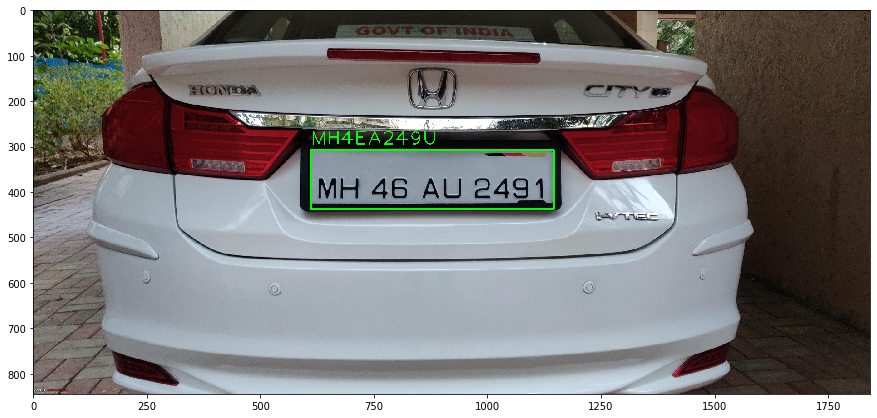

In [114]:

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        #olor = colors[class_ids[i]]
        cv2.rectangle(img, (x, y), (x + w, y + h), (0,255,0), 3)
        cv2.putText(img, final, (x, y -10), font, 3,(0,255,0), 2)


    #cv2.imshow("Image", img)
plate_image=img[y:y+h,x:x+w]
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))

plt.imshow(img)